

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         1850 non-null   int64  
 1   course_type       1850 non-null   object 
 2   year              1850 non-null   int64  
 3   enrollment_count  1850 non-null   int64  
 4   pre_score         1850 non-null   object 
 5   post_score        1665 non-null   float64
 6   pre_requirement   959 non-null    object 
 7   department        1850 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 115.8+ KB
None


Missing values after cleaning:
 course_id           0
course_type         0
year                0
enrollment_count    0
pre_score           0
post_score          0
pre_requirement     0
department          0
dtype: int64



Summary Statistics:
          course_id course_type         year  enrollment_count    pre_score  \
count   1850.000000        1

<Figure size 1000x600 with 0 Axes>

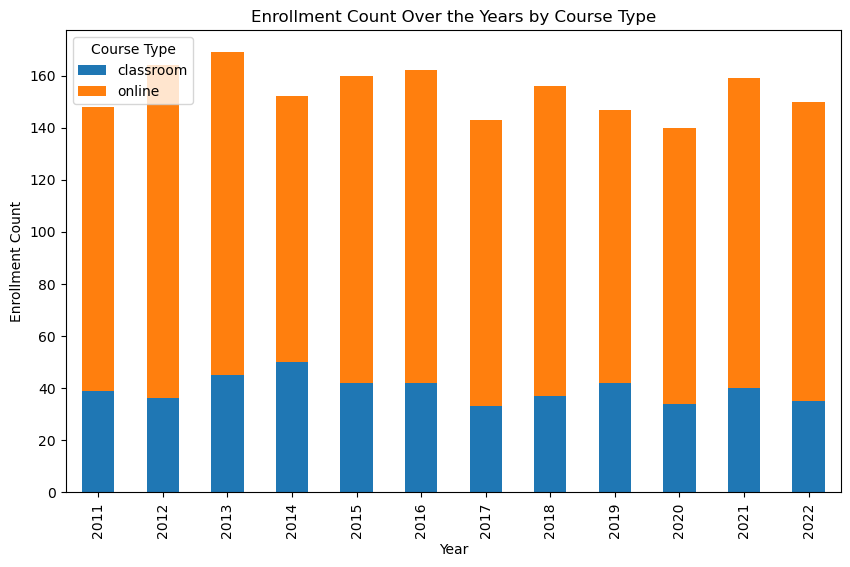

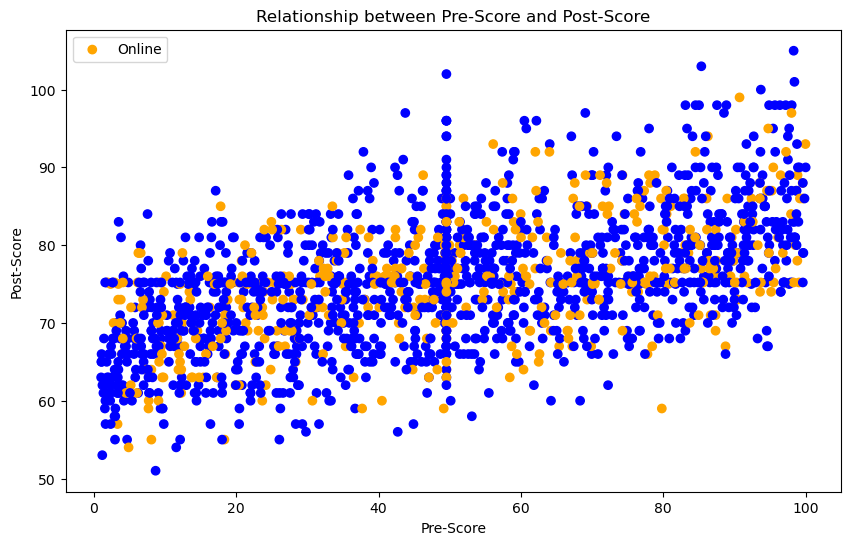




Average Enrollment by Course Type:
course_type
classroom    170.429474
online       252.685091
Name: enrollment_count, dtype: float64




<Figure size 1000x600 with 0 Axes>

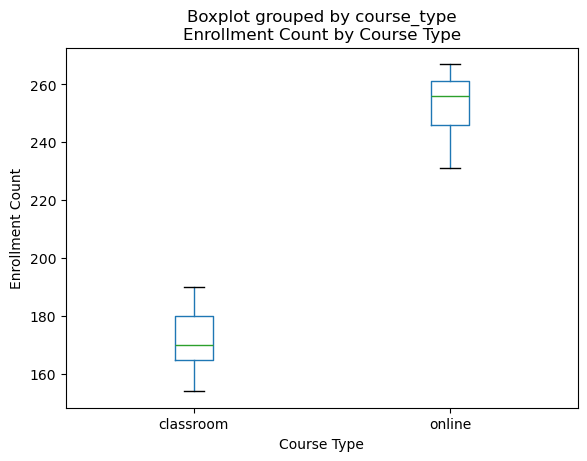




Correlation Matrix:
                  course_id      year  enrollment_count  pre_score  post_score
course_id          1.000000 -0.008122         -0.018053  -0.013338   -0.028502
year              -0.008122  1.000000          0.018733  -0.027292    0.011042
enrollment_count  -0.018053  0.018733          1.000000  -0.009318    0.007179
pre_score         -0.013338 -0.027292         -0.009318   1.000000    0.535085
post_score        -0.028502  0.011042          0.007179   0.535085    1.000000




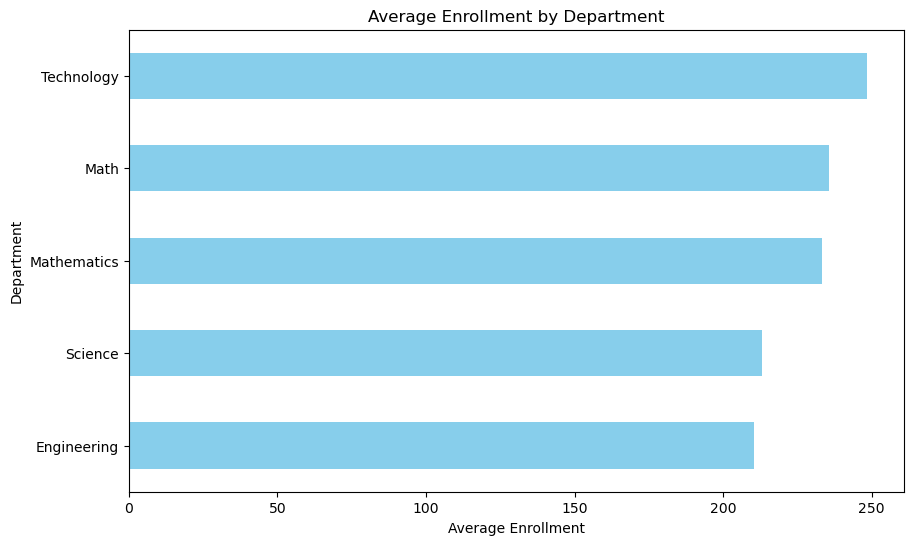




T-Test Results for Enrollment Count by Course Type:
T-Statistic: 177.0383377938837
P-Value: 0.0


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\Users\Huawei\Downloads\university_enrollment_(Mini-project-01).csv'  # replace with your file path
data = pd.read_csv(file_path)
print('\n')
#to know about the data types of columns and the number of non null enterires to perform releveant operation on dataset
print(data.info())
# Convert `pre_score` to numeric, forcing errors to NaN(Not a number) as shown by info method that pre_score datatype is object which means it contain string data, not numeric
data['pre_score'] = pd.to_numeric(data['pre_score'], errors='coerce')

# Fill missing values in `pre_requirement` with "Unknown"
data['pre_requirement'].fillna('Unknown', inplace=True)

# Fill missing values in `pre_score` and `post_score` with their respective means
data['pre_score'].fillna(data['pre_score'].mean(), inplace=True)
data['post_score'].fillna(data['post_score'].mean(), inplace=True)
print('\n')
# Verify that there are no more missing values
print("Missing values after cleaning:\n", data.isna().sum())
print('\n')
# Summary Statistics
print("\nSummary Statistics:")
print(data.describe(include='all'))

# Exploratory Data Analysis (EDA)
# Enrollment counts over the years by course type
plt.figure(figsize=(10, 6))
data.groupby(['year', 'course_type']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))#unstack re_organizes tha data for better visualization, #kind=bar means a bar chart and stacked=true means stack bars on top of each other
plt.title('Enrollment Count Over the Years by Course Type')
plt.xlabel('Year')
plt.ylabel('Enrollment Count')
plt.legend(title='Course Type')
plt.show()
print('\n')
# Relationship between pre_score and post_score
plt.figure(figsize=(10, 6))
plt.scatter(data['pre_score'], data['post_score'], c=np.where(data['course_type'] == 'online', 'blue', 'orange'))
plt.title('Relationship between Pre-Score and Post-Score')
plt.xlabel('Pre-Score')
plt.ylabel('Post-Score')
plt.legend(['Online', 'Classroom'])
plt.show()
print('\n')
# Average enrollment by course type
average_enrollment = data.groupby('course_type')['enrollment_count'].mean()
print("\nAverage Enrollment by Course Type:")
print(average_enrollment)
print('\n')
# Boxplot to compare enrollments by course type
plt.figure(figsize=(10, 6))
data.boxplot(column='enrollment_count', by='course_type', grid=False)
plt.title('Enrollment Count by Course Type')
plt.xlabel('Course Type')
plt.ylabel('Enrollment Count')
plt.show()
print('\n')
# Factors contributing to higher enrollment
# Correlation matrix
correlation_matrix = data.select_dtypes(include=[np.number]).corr()
#actually .cor calculates the pairwise co_relation of columns and require numeric data 
#coursetype, pre_requirement and department columns are of string, so it gets excluded automatically
#select_dtypes(include=[np.number] only select the numeric columns from the data 
print("\nCorrelation Matrix:")
print(correlation_matrix)
print('\n')
# Bar plot of average enrollments by department
average_enrollment_department = data.groupby('department')['enrollment_count'].mean().sort_values()
plt.figure(figsize=(10, 6))
average_enrollment_department.plot(kind='barh', color='skyblue')
plt.title('Average Enrollment by Department')
plt.xlabel('Average Enrollment')
plt.ylabel('Department')
plt.show()
print('\n')
# Statistical test to analyze significance of course type on enrollment
from scipy.stats import ttest_ind

# T-test
online_enrollment = data[data['course_type'] == 'online']['enrollment_count']
classroom_enrollment = data[data['course_type'] == 'classroom']['enrollment_count']
t_stat, p_value = ttest_ind(online_enrollment, classroom_enrollment)
print("\nT-Test Results for Enrollment Count by Course Type:")
print("T-Statistic:", t_stat)# t_stat calculate the average value of two groups difference 
# My findings after the analysis
# T-Statistic value is 177.03.. which indicates there is a large differnence between the average enrollment counts for online and classroom courses
# The groups of online and classroom courses are significantly different from each other due to large value of t_stat
print("P-Value:", p_value)#p_value calculate the probability that difference between the groups happenend by chance.
# My findings after the analysis
# p value is 0.0 which tells us there is zero probability that observed difference between groups happened by chance
# so course type has a significant effect on enrollment



